In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import scipy.special as sp
from scipy.stats import norm
import cvxpy as cp
import numpy as np
np.random.seed(0)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})

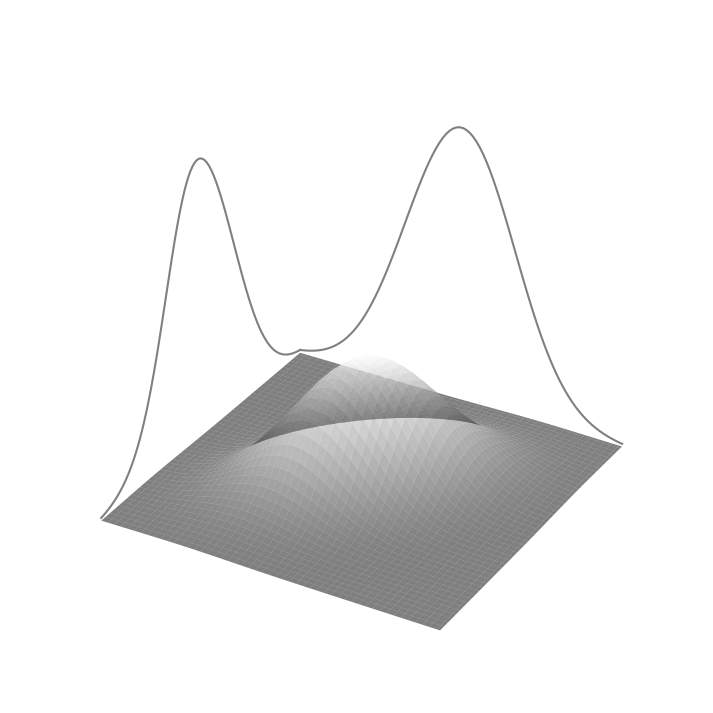

In [18]:
# Update covariance to have smaller variance
cov = [[0.5, 0.2], [0.2, 0.5]]
mean = [0.0, 0.0]

# Define parameters for the 2D Gaussian distribution
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Create grid and multivariate normal
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Define the 2D Gaussian distribution
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Marginals over x1 and x2
marginal_x1 = multivariate_normal(mean[0], cov[0][0]).pdf(x)
marginal_x2 = multivariate_normal(mean[1], cov[1][1]).pdf(y)


# Create updated 3D plot
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian surface
ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none', alpha=0.5)

# Plot marginals along the vertical axis
ax.plot(x, 3 * np.ones_like(x), marginal_x1, label='Marginal over $x_1$', color='gray')
ax.plot(-3 * np.ones_like(y), y, marginal_x2, label='Marginal over $x_2$', color='gray')
ax.set_axis_off()

plt.savefig("gaussian_marginals.pdf", bbox_inches='tight')

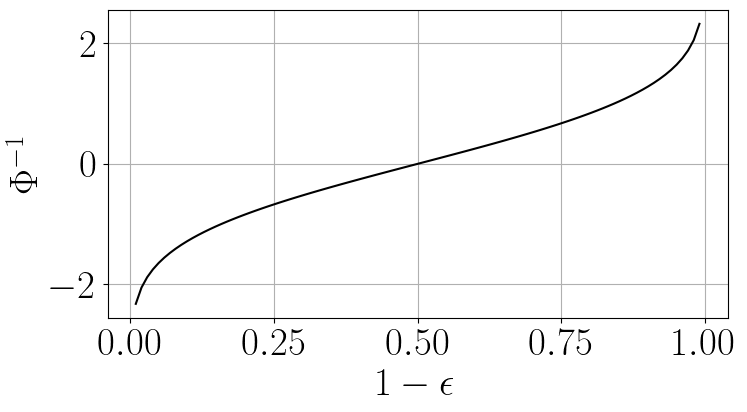

In [53]:
# Plot gaussian inverse cdf

# Generate a range of probabilities
p = np.linspace(0.01, 0.99, 100)

# Compute the inverse CDF (percent-point function)
cdf_inv = norm.ppf(p)
# x = -np.sqrt(2) * sp.erfinv(1 - 2 * p);

# Plot the inverse CDF
plt.figure(figsize=(8, 4))
plt.plot(p, cdf_inv, color='k')
plt.xticks(np.linspace(0, 1, 5))
plt.xlabel(r'$1 - \epsilon$')
plt.ylabel(r'$\Phi^{-1}$')
plt.grid()
# plt.legend()
plt.savefig("inv_gauss_cdf.pdf", bbox_inches='tight')